Show crude rate grouped by, and add some analysis: 
* Gender - jared.sarabia@gmail.com
* Socioeconomic group - jared.sarabia@gmail.com
* Race - curtis.robords@gmail.com
* Age Groups - jared.sarabia@gmail.com
* Time series of different codes - Goal is to show why we are focusing on Fentanyl: curtis.robords@gmail.com
  * Talk about correlation vs. causation caveat


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
cleaned = pd.read_csv('cleaned_wonder.csv')

In [3]:
cleaned.head(2)

,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile,age_midpoint
0,Opium,T40.0,2001,2001,Female,F,White,2106-3,40-44 years,40-44,5,1783717,0.280314,1,42.0
1,Opium,T40.0,2003,2003,Female,F,Black or African American,2054-5,25-29 years,25-29,5,330059,1.514881,1,27.0


In [4]:
cleaned.dtypes

Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                            int64
Population                        int64
Crude Rate                      float64
socioec quintile                  int64
age_midpoint                    float64
dtype: object

## Time series of different codes

Why we focus on Fentanyl:

Fentanyl, categorized under "Other synthetic narcotics", has skyrocketed as a COD since 2015:

In [5]:
cleaned['Year'].unique()

array([2001, 2003, 2004, 2006, 2012, 2013, 2016, 2017, 2018, 2019, 2020,
       1999, 2000, 2002, 2005, 2007, 2008, 2009, 2010, 2011, 2014, 2015])

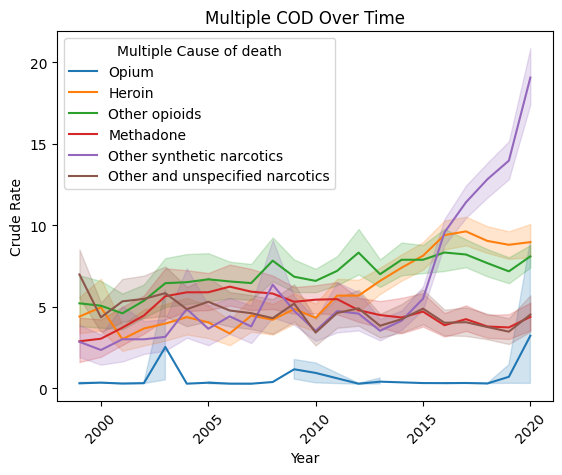

In [6]:
# Sum of Deaths over time
COD_Code = sns.lineplot(data=cleaned, x='Year', y='Crude Rate', hue='Multiple Cause of death')

for item in COD_Code.get_xticklabels():
    item.set_rotation(45)
title = 'Multiple COD Over Time'

COD_Code.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")

In [7]:
fentanyl = cleaned[cleaned['Multiple Cause of death'] == 'Other synthetic narcotics']

### Crude Rate by Race

/var/folders/yl/zy_202992md5vzz6c5thvp6w0000gr/T/ipykernel_73270/1272060164.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  race_plot = sns.barplot(data=fentanyl, x='Race', y='Crude Rate', hue='Year', ci=None)


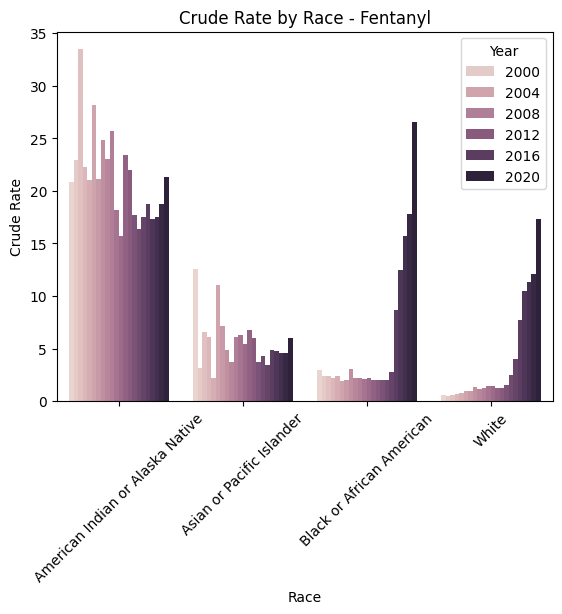

In [19]:
race_plot = sns.barplot(data=fentanyl, x='Race', y='Crude Rate', hue='Year', ci=None)

for item in race_plot.get_xticklabels():
    item.set_rotation(45)
title = 'Crude Rate by Race - Fentanyl'

race_plot.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")


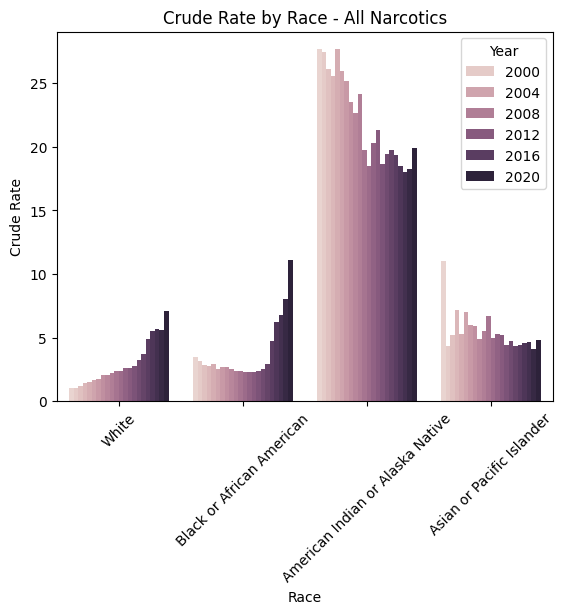

In [21]:
race_plot = sns.barplot(data=cleaned, x='Race', y='Crude Rate', hue='Year', errorbar=None)

for item in race_plot.get_xticklabels():
    item.set_rotation(45)
title = 'Crude Rate by Race - All Narcotics'

race_plot.set(title=title)

# save the plot as PNG file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")

## Why do we need to "smooth out" our predictions?

The raw count, or crude rate of deaths, across different groups is highly variable, where the crude rate can be very sensitive to just a few extra deaths.  There are two problems the team is looking to solve with a model: 1) a predictive model will ensure the government is more proactive, rather than reactive and 2) modeled estimates are much more stable.  This will ensure funding is allocated in a more stable manner.

In [10]:
# Calculate the variance of crude rate
fentanyl['Crude Rate'].var()

142.73710952843442

In [11]:
fentanyl.groupby(['Five-Year Age Groups Code'])['Crude Rate'].var()

Five-Year Age Groups Code
1-4        4.185409
10-14     10.357330
15-19     23.985853
20-24     46.384048
25-29    111.348460
30-34    146.780271
35-39    142.190356
40-44    118.696626
45-49    125.022098
5-9       11.695501
50-54    159.352833
55-59    181.149826
60-64    204.530439
65-69    274.750017
70-74    120.789578
75-79    204.573011
80-84    281.171847
< 1        7.847339
Name: Crude Rate, dtype: float64

/var/folders/yl/zy_202992md5vzz6c5thvp6w0000gr/T/ipykernel_73270/1518830356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fentanyl['Death Range'] = (fentanyl['Deaths'] // 100) * 100
/var/folders/yl/zy_202992md5vzz6c5thvp6w0000gr/T/ipykernel_73270/1518830356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fentanyl['Death Range'] = fentanyl['Death Range'].astype(str) + '-' + (fentanyl['Death Range'] + 99).astype(str)


[Text(0.5, 1.0, 'Crude Rate by Deaths - Fentanyl')]

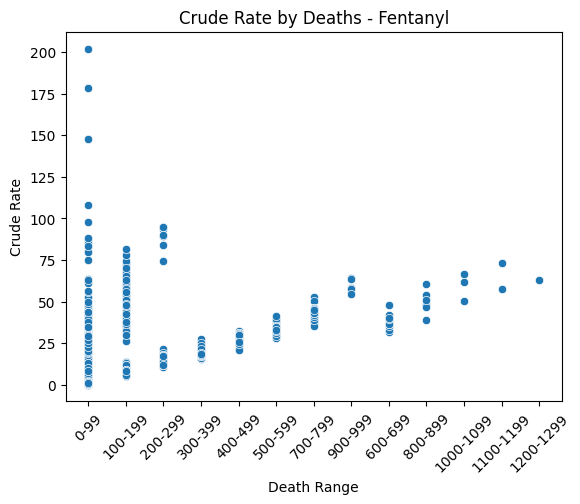

In [12]:

# Create a new column with the death ranges of 10
fentanyl['Death Range'] = (fentanyl['Deaths'] // 100) * 100

# Optionally, you can create a string representation of the ranges
fentanyl['Death Range'] = fentanyl['Death Range'].astype(str) + '-' + (fentanyl['Death Range'] + 99).astype(str)

deaths_crude_rate_plot = sns.scatterplot(data=fentanyl,
                                         y="Crude Rate", x="Death Range")

for item in deaths_crude_rate_plot.get_xticklabels():
    item.set_rotation(45)

title = 'Crude Rate by Deaths - Fentanyl'
deaths_crude_rate_plot.set(title=title)

In [13]:
fentanyl.groupby(['Death Range'])['Crude Rate'].var().reset_index().sort_values(by='Crude Rate')

,Death Range,Crude Rate
6,300-399,8.116590
7,400-499,9.264011
8,500-599,12.115344
9,600-699,14.429864
12,900-999,17.113957
10,700-799,19.973485
11,800-899,51.421018
2,1000-1099,65.868278
0,0-99,94.476123
3,1100-1199,121.965663


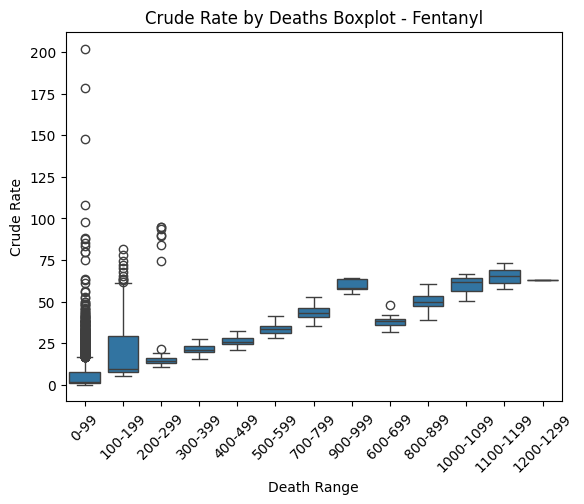

In [14]:
deaths_crude_rate_boxplot = sns.boxplot(fentanyl, x="Death Range", y="Crude Rate")
for item in deaths_crude_rate_boxplot.get_xticklabels():
    item.set_rotation(45)

title = 'Crude Rate by Deaths Boxplot - Fentanyl'
deaths_crude_rate_boxplot.set(title=title)

# save the plot as SVg file
plt.savefig(f"{title}.svg", format='svg', bbox_inches="tight")

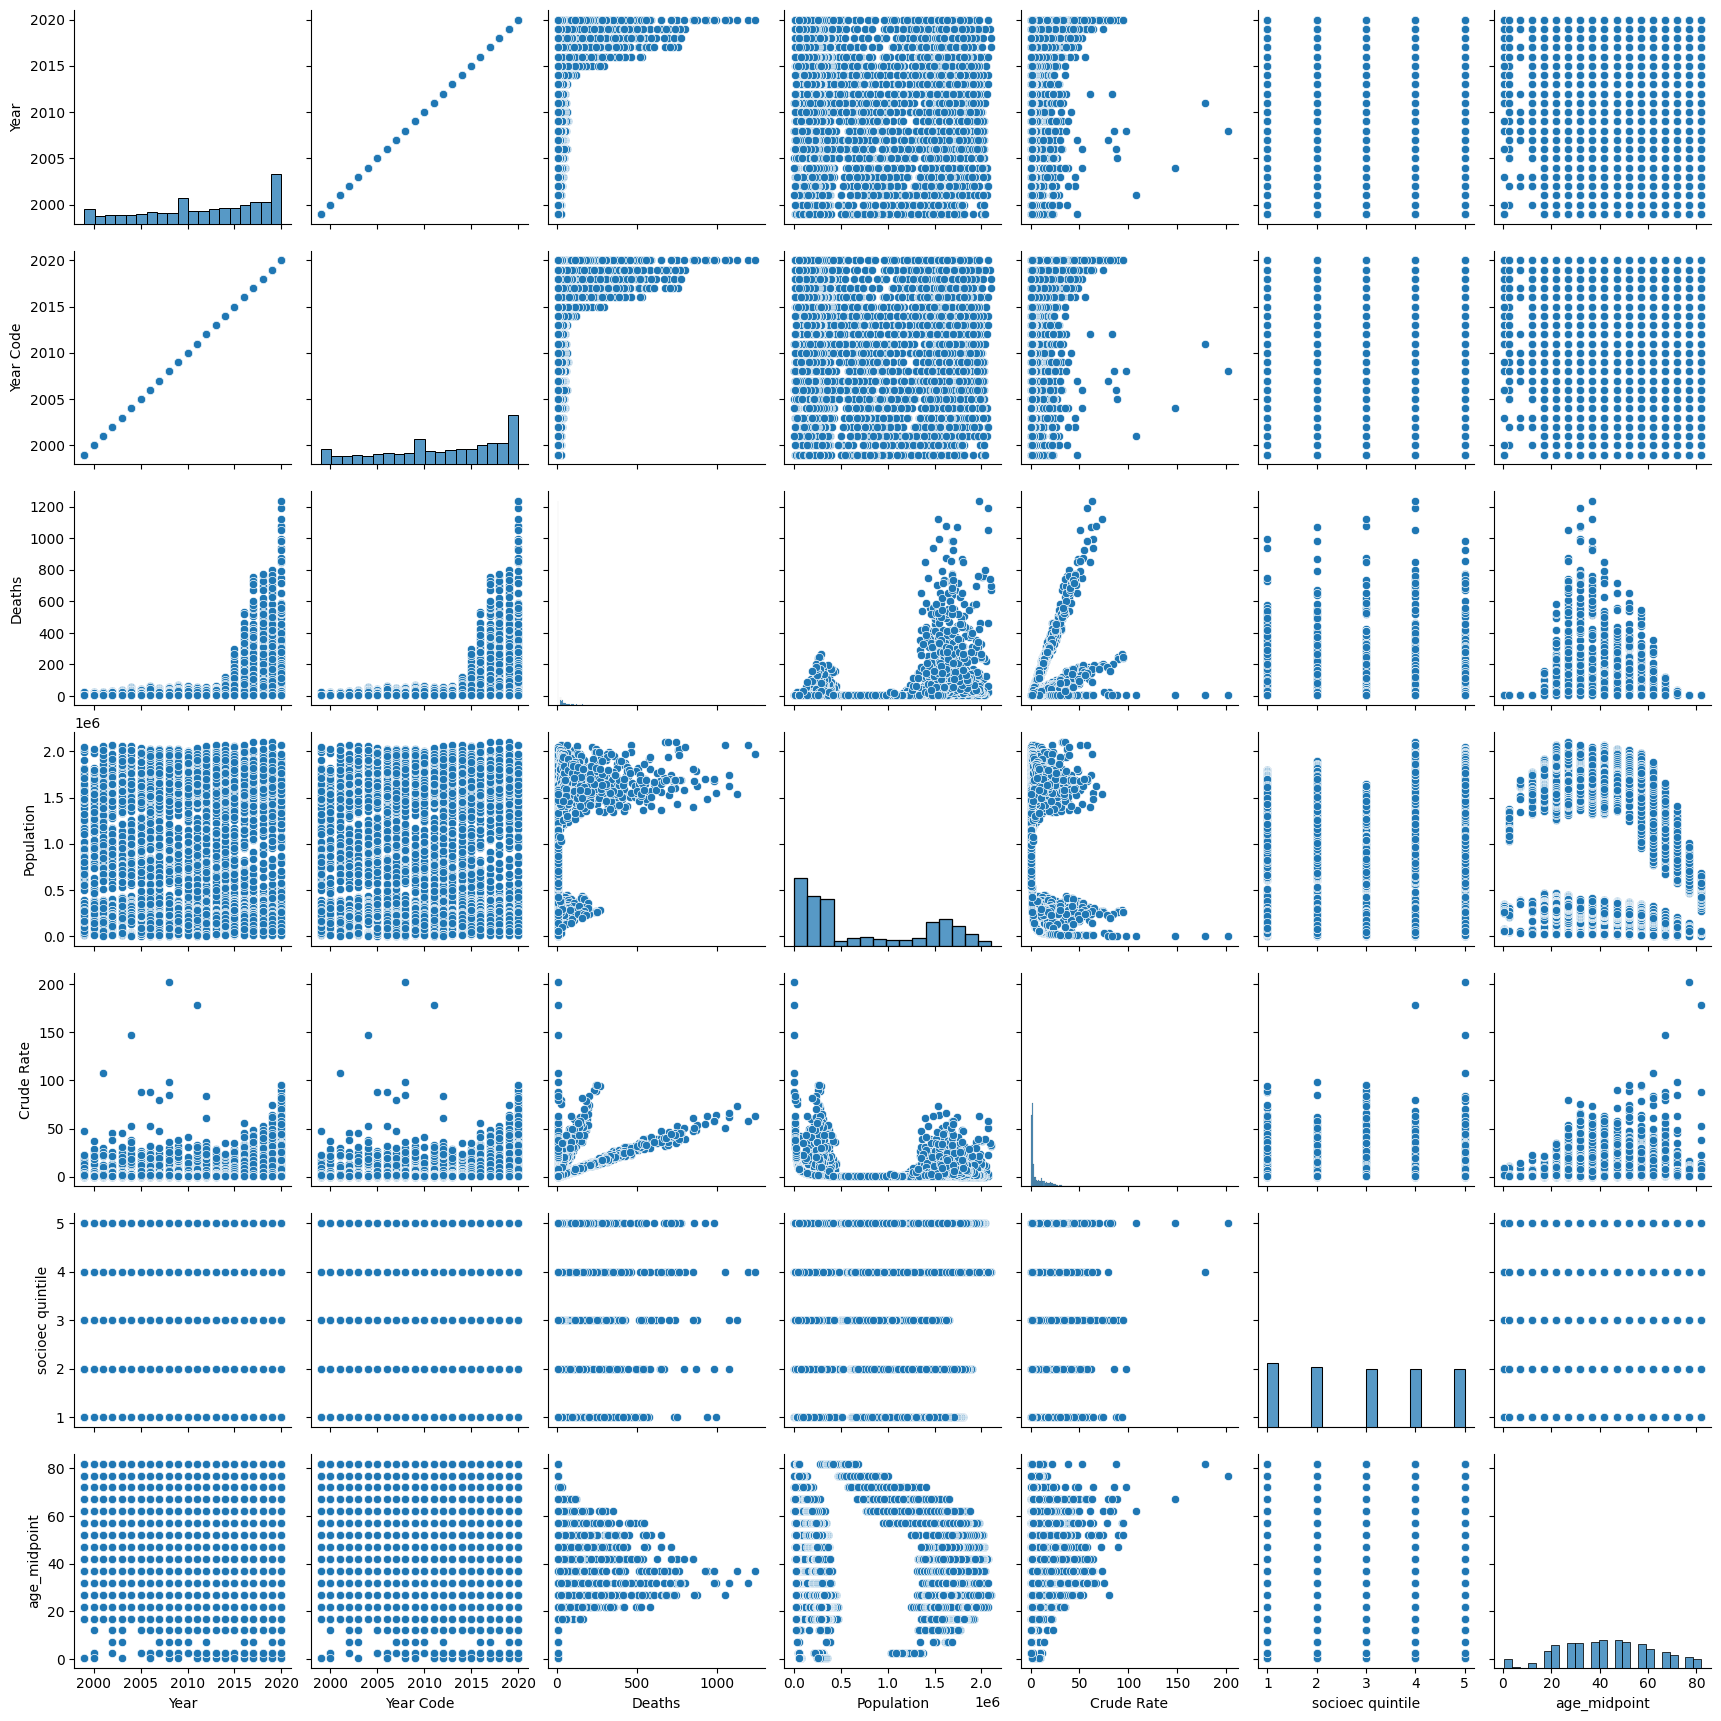

In [15]:
sns.pairplot(fentanyl)